# Assigment 4

##### Geoffroy Penny, milucy fernandes, Polly

In [1]:
import pandas as pd
import seaborn as sns
sns.set()
from sklearn import tree
from treeviz import tree_print
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Garch.csv')

In [3]:
df.head()

,Unnamed: 0,date,day,dm,ddm,bp,cd,dy,sf
0,1,800102,wednesday,0.5861,NaN,2.2490,0.8547,0.004206,0.6365
1,2,800103,thursday,0.5837,-0.004103,2.2365,0.8552,0.004187,0.6357
2,3,800104,friday,0.5842,0.000856,2.2410,0.8566,0.004269,0.6355
3,4,800107,monday,0.5853,0.001881,2.2645,0.8538,0.004315,0.6373
4,5,800108,tuesday,0.5824,-0.004967,2.2560,0.8553,0.004257,0.6329


#### To drop the NaN's rows from our data

In [4]:
df = df.dropna(how='any', axis=0)

#### To drop the categorical columns from our data

In [5]:
df_numerical = df.drop(['Unnamed: 0', 'date', 'day'], axis=1)

#### The Numerical data set

In [6]:
df_numerical.head()

,dm,ddm,bp,cd,dy,sf
1,0.5837,-0.004103,2.2365,0.8552,0.004187,0.6357
2,0.5842,0.000856,2.2410,0.8566,0.004269,0.6355
3,0.5853,0.001881,2.2645,0.8538,0.004315,0.6373
4,0.5824,-0.004967,2.2560,0.8553,0.004257,0.6329
5,0.5834,0.001716,2.2650,0.8565,0.004245,0.6349


#### Some scatter plots

C:\Users\geoffroy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


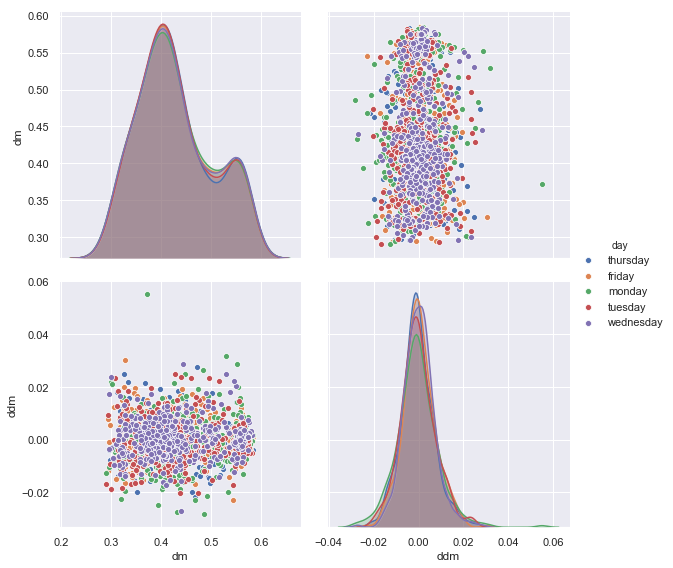

In [7]:
sns.pairplot(df, hue='day', height=4, vars=["dm", "ddm"])

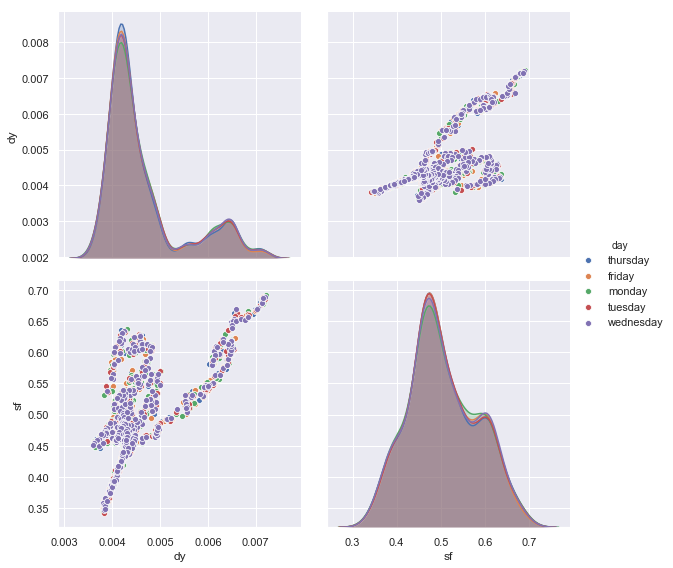

In [8]:
sns.pairplot(df, hue='day', height=4, vars=["dy", "sf"])

#### Bar graphs for the 'Days' Column 

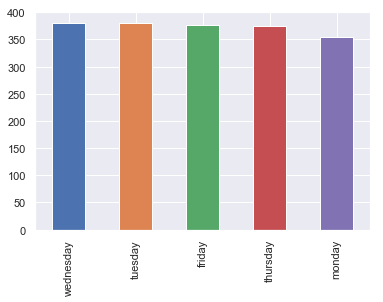

In [9]:
df['day'].value_counts().plot(kind='bar')

#### Histograms for 'dm' and 'ddm' columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000282D4A61710>]],
      dtype=object)

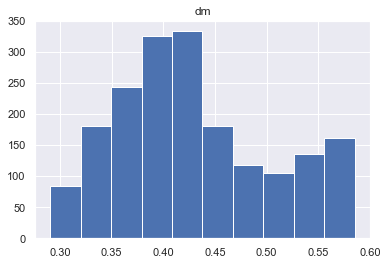

In [10]:
df.hist("dm")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000282D4E85BA8>]],
      dtype=object)

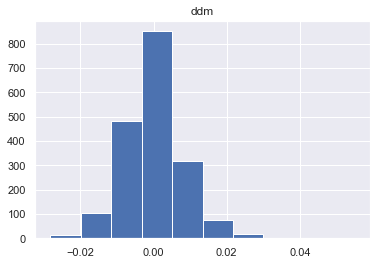

In [11]:
df.hist("ddm")

#### Set up the data for the decision tree

In [12]:
df_dtree = tree.DecisionTreeClassifier(criterion='entropy')

In [13]:
df_categorical = pd.DataFrame(df['day'])

In [14]:
df_dtree.fit(df_numerical, df_categorical)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Print the tree

In [15]:
tree_print(df_dtree, df_numerical)

if ddm =< -0.00841267267242074: 
  |then if bp =< 1.8774999976158142: 
  |  |then if cd =< 0.7819499969482422: 
  |  |  |then if ddm =< -0.019170846790075302: 
  |  |  |  |then if cd =< 0.738400012254715: 
  |  |  |  |  |then if cd =< 0.7086499929428101: 
  |  |  |  |  |  |then wednesday
  |  |  |  |  |  |else monday
  |  |  |  |  |else if dm =< 0.44849999248981476: 
  |  |  |  |  |  |then thursday
  |  |  |  |  |  |else friday
  |  |  |  |else if ddm =< -0.016486816108226776: 
  |  |  |  |  |then if cd =< 0.7126000225543976: 
  |  |  |  |  |  |then friday
  |  |  |  |  |  |else if dy =< 0.004856499843299389: 
  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |else if bp =< 1.4825000166893005: 
  |  |  |  |  |  |  |  |then monday
  |  |  |  |  |  |  |  |else tuesday
  |  |  |  |  |else if cd =< 0.7765499949455261: 
  |  |  |  |  |  |then if bp =< 1.5197499990463257: 
  |  |  |  |  |  |  |then if dm =< 0.48749999701976776: 
  |  |  |  |  |  |  |  |then if bp =< 1.0722500085830688: 


  |  |  |  |  |  |  |  |  |  |  |else monday
  |  |  |  |  |  |  |  |  |else if dy =< 0.003928999998606741: 
  |  |  |  |  |  |  |  |  |  |then if sf =< 0.47849999368190765: 
  |  |  |  |  |  |  |  |  |  |  |then wednesday
  |  |  |  |  |  |  |  |  |  |  |else tuesday
  |  |  |  |  |  |  |  |  |  |else if bp =< 1.4897500276565552: 
  |  |  |  |  |  |  |  |  |  |  |then if ddm =< -0.009004331659525633: 
  |  |  |  |  |  |  |  |  |  |  |  |then wednesday
  |  |  |  |  |  |  |  |  |  |  |  |else monday
  |  |  |  |  |  |  |  |  |  |  |else monday
  |  |  |  |  |  |  |  |else if sf =< 0.4747999906539917: 
  |  |  |  |  |  |  |  |  |then if dy =< 0.004050499992445111: 
  |  |  |  |  |  |  |  |  |  |then friday
  |  |  |  |  |  |  |  |  |  |else tuesday
  |  |  |  |  |  |  |  |  |else if sf =< 0.4854999929666519: 
  |  |  |  |  |  |  |  |  |  |then monday
  |  |  |  |  |  |  |  |  |  |else if bp =< 1.5372499823570251: 
  |  |  |  |  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |  |  |

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if cd =< 0.7681500017642975: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if ddm =< -0.001609427505172789: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if ddm =< -0.0018769282614812255: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dy =< 0.004130500135943294: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if ddm =< -0.004712759284302592: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if ddm =< -0.006923791021108627: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then monday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dy =< 0.00409199995

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if cd =< 0.724700003862381: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if ddm =< -0.002420661738142371: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dm =< 0.4929499924182892: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dy =< 0.006462999852374196: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if sf =< 0.5245999991893768: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if ddm =< -0.000692458706907928: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dm =< 0.548799991607666: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if cd =< 0.7547000050544739: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if bp =< 1.512499988079071: 
  |  |  |  |  | 

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if bp =< 1.8019999861717224: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if ddm =< -0.005519669037312269: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dm =< 0.4041000008583069: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if sf =< 0.4541500061750412: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dy =< 0.004246999975293875: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then monday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if ddm =< -0.007119036046788096: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dy =< 0.004306500079110265: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if ddm =< -0.0024213092401623726: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if bp =< 1.527999997138977: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if ddm =< -0.0025680027902126312: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if ddm =< -0.003353204927407205: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dy =< 0.004121999954804778: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else friday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dy =< 0.004290499957278371: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if cd =< 0.7995499968528748: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if ddm =< -0.001439502346329391: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if sf =< 0.4887000173330307: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  | 

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else monday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if cd =< 0.8378000259399414: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if sf =< 0.4648499935865402: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if cd =< 0.8350000083446503: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then monday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if cd =< 0.8478499948978424: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if cd =< 0.8459999859333038: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dm =< 0.4574500024318695: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else friday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dy =< 0.004244999960064888: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else monday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  | 

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if cd =< 0.8198499977588654: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dm =< 0.4377000033855438: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else friday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dm =< 0.42055000364780426: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if d

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dy =< 0.0043154999148100615: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if bp =< 1.3039999604225159: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if bp =< 1.2535000443458557: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if bp =< 1.7862499952316284: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if cd =< 0.8096999824047089: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dm =< 0.3634999990463257: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then monday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  | 

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dy =< 0.003987999865785241: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dm =< 0.4093499928712845: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if cd =< 0.7819999754428864: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if ddm =< 0.0012419898994266987: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if ddm =< 0.0009922093304339796: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else monday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dm =< 0.39514999091625214: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if cd =< 0.7179500162601471: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then monday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if bp =< 1.4952499866485596: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if bp =< 1.9172499775886536: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if sf =< 0.533350020647049

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dy =< 0.0043039999436587095: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if bp =< 1.3889999985694885: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else friday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dy =< 0.004551500082015991: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else friday
  |  |  |  |  |  |  |  |  |  |  |

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if cd =< 0.7485000193119049: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if ddm =< 0.005469741532579064: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then friday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if ddm =< 0.004829764598980546: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if ddm =< 0.005688883131369948: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dm =< 0.3656499981880188: 
  |  |  |  |  |

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if cd =< 0.7609499990940094: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if ddm =< 0.004701288882642984: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else friday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if sf =< 0.6164999902248383: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dy =< 0.004618000006303191: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if bp =< 2.3393499851226807: 

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dy =< 0.004269500030204654: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if ddm =< 0.008614141028374434: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dm =< 0.37880000472068787: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then friday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if sf =< 0.4621500074863434: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then monday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if sf =< 0.48319999873638153: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dm =< 0.3843500018119812: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then monday
  |  |  |  |  |  |  |  |  |  |  |  

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else friday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dy =< 0.004498499911278486: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if cd =< 0.8334499895572662: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if ddm =< 0.017049552407115698: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then monday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else friday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dy =< 0.004853999940678477: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if sf =< 0.5443499982357025: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dy =< 0.004621000029146671: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if sf =<

#### Find the predicted labels

In [16]:
predict_array = df_dtree.predict(df_numerical)

In [17]:
predicted_labels = pd.DataFrame(predict_array)

In [18]:
predicted_labels.columns = ['day']

#### The predicted labels

In [19]:
predicted_labels.head()

,day
0,thursday
1,friday
2,monday
3,tuesday
4,wednesday


#### The actual labels

In [20]:
df_categorical.head()

,day
1,thursday
2,friday
3,monday
4,tuesday
5,wednesday


In [21]:
print("Our model accuracy is: {}".format(accuracy_score(df_categorical, predicted_labels)))

Our model accuracy is: 0.9994640943193998


#### Creates the second dtree with max depth of 34

In [22]:
dtree2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=34)

In [23]:
dtree2.fit(df_numerical,df_categorical)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=34,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
tree_print(dtree2,df_numerical)

if ddm =< -0.00841267267242074: 
  |then if bp =< 1.8774999976158142: 
  |  |then if cd =< 0.7819499969482422: 
  |  |  |then if ddm =< -0.019170846790075302: 
  |  |  |  |then if cd =< 0.738400012254715: 
  |  |  |  |  |then if cd =< 0.7086499929428101: 
  |  |  |  |  |  |then wednesday
  |  |  |  |  |  |else monday
  |  |  |  |  |else if sf =< 0.5380500108003616: 
  |  |  |  |  |  |then thursday
  |  |  |  |  |  |else friday
  |  |  |  |else if ddm =< -0.016486816108226776: 
  |  |  |  |  |then if cd =< 0.7126000225543976: 
  |  |  |  |  |  |then friday
  |  |  |  |  |  |else if dy =< 0.004856499843299389: 
  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |else if dm =< 0.4914499968290329: 
  |  |  |  |  |  |  |  |then monday
  |  |  |  |  |  |  |  |else tuesday
  |  |  |  |  |else if cd =< 0.7765499949455261: 
  |  |  |  |  |  |then if bp =< 1.5197499990463257: 
  |  |  |  |  |  |  |then if dm =< 0.48749999701976776: 
  |  |  |  |  |  |  |  |then if bp =< 1.0722500085830688: 
 

  |  |  |  |  |  |then if cd =< 0.744299978017807: 
  |  |  |  |  |  |  |then friday
  |  |  |  |  |  |  |else wednesday
  |  |  |  |  |  |else if bp =< 2.334749937057495: 
  |  |  |  |  |  |  |then thursday
  |  |  |  |  |  |  |else wednesday
  |  |  |  |  |else if ddm =< -0.007766964612528682: 
  |  |  |  |  |  |then if dy =< 0.004357500001788139: 
  |  |  |  |  |  |  |then if ddm =< -0.00807119905948639: 
  |  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |  |else if bp =< 1.4839999675750732: 
  |  |  |  |  |  |  |  |  |then if ddm =< -0.007950139697641134: 
  |  |  |  |  |  |  |  |  |  |then if ddm =< -0.008018781431019306: 
  |  |  |  |  |  |  |  |  |  |  |then monday
  |  |  |  |  |  |  |  |  |  |  |else thursday
  |  |  |  |  |  |  |  |  |  |else monday
  |  |  |  |  |  |  |  |  |else if bp =< 1.52224999666214: 
  |  |  |  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |  |  |  |else if ddm =< -0.00781227950938046: 
  |  |  |  |  |  |  |  |  |  |  |then thursday
  |  

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dy =< 0.007035499904304743: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if ddm =< -0.0061583316419273615: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dm =< 0.44874998927116394: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if bp =< 1.4107499718666077: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then monday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if bp =< 1.512499988079071: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dy =< 0.006402499973773956: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if ddm =< -0.00505935656838119: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if ddm =< -0.002314833691343665: 
  |  |  |  |  |  |  |  |  |  |  |  

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if ddm =< -0.004466614220291376: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if sf =< 0.4647499918937683: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else friday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dy =< 0.00400149985216558: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else friday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if ddm =< -0.004854434402659535: 
  |  

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if cd =< 0.8305499851703644: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if bp =< 1.996500015258789: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dy =< 0.004488500067964196: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dm =< 0.4397999942302704: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dy =< 0.004273500060662627: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if sf =< 0.4590499997138977: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if cd =< 0.7827999889850616: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then friday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if cd =< 0.8007999956607819: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else friday
  |  |  |  |  |  |  |  |  |  

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dy =< 0.0045594999101012945: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if sf =< 0.4964499920606613: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then friday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else monday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dm =< 0.5629499852657318: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if cd =< 0.8623000085353851: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  | 

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else monday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if sf =< 0.6225000023841858: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if cd =< 0.8634499907493591: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then friday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if cd =< 0.867000013589859: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then friday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dy =< 0.004548500059172511: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if bp =< 1.4385000467300415: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if ddm =< 0.0009855871321633458: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dy =< 0.004944500047713518: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then monday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if ddm =< 0.001746160676702857: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if bp =< 1.4355000257492065: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else fri

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else friday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if bp =< 2.3625000715255737: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then monday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else friday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if cd =< 0.8642999827861786: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dm =< 0.5455499887466431: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if ddm =< 0.0028447089716792107: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if ddm =< 0.0031788249034434557: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if ddm =< 0.00293735484592616

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else monday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dy =< 0.004355499986559153: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if bp =< 1.6990000009536743: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if bp =< 1.4672499895095825: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then friday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else monday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dy =< 0.004203000105917454: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if bp =< 1.7727500200271606: 
  |  |  |  |  |  |  

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then friday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if ddm =< 0.006935518002137542: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else friday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if ddm =< 0.006964373402297497: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then thursday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else monday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if ddm =< 0.006850564852356911: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if sf =< 0.5469500124454498: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if cd =< 0.8134500086307526: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if dy =< 0.00405499991029501: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  

  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then if bp =< 1.4855000376701355: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dm =< 0.4546000063419342: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then friday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else monday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if ddm =< 0.011717000044882298: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dm =< 0.49924999475479126: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then wednesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if sf =< 0.6127000153064728: 
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |then tuesday
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |else if dy =< 0.006373499985784292: 
  

In [25]:
predict_array2 = dtree2.predict(df_numerical)

In [26]:
predicted_labels2 = pd.DataFrame(predict_array2)

In [27]:
predicted_labels2.columns = ['day'] 

In [28]:
print("Our model accuracy is: {}".format(accuracy_score(df_categorical, predicted_labels2)))

Our model accuracy is: 0.897642015005359


### Report

Are your independent variables uni- or multimodal? 
    
    The independentat variables are multimodal due to the data having multiple peaks on the density plot .

Can you identify clusters when performing scatter plots? 
    
    Yes, there are clusters in our scatter plots. The data forms multiple small clusters and big clusters when graphing.
    
Are those clusters related to your decision tree model? 
    
    
What about the different levels of your dependent variable - are they equally represented?

How does the best decision tree model and your new model compare in terms of interpretability?

Do they agree on the major trends/predictions?